In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd
from datetime import timedelta

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'#'/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [14]:
window = 10000 
df = pd.DataFrame({'3.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})
counts = pd.DataFrame({'3.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '7.0':[0, 0, 0, 0, 0, 0, 0, 0]})

aad = pd.DataFrame({'3.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})

ad = pd.DataFrame({'3.0':[[], [], [], [], [], [], [], []],
                   '3.1':[[], [], [], [], [], [], [], []],
                   '3.2':[[], [], [], [], [], [], [], []],
                   '3.3':[[], [], [], [], [], [], [], []],
                   '3.4':[[], [], [], [], [], [], [], []],
                   '3.5':[[], [], [], [], [], [], [], []],
                   '3.6':[[], [], [], [], [], [], [], []],
                   '3.7':[[], [], [], [], [], [], [], []],
                   '3.8':[[], [], [], [], [], [], [], []],
                   '3.9':[[], [], [], [], [], [], [], []],
                   '4.0':[[], [], [], [], [], [], [], []],
                   '4.1':[[], [], [], [], [], [], [], []],
                   '4.2':[[], [], [], [], [], [], [], []],
                   '4.3':[[], [], [], [], [], [], [], []],
                   '4.4':[[], [], [], [], [], [], [], []],
                   '4.5':[[], [], [], [], [], [], [], []],
                   '4.6':[[], [], [], [], [], [], [], []],
                   '4.7':[[], [], [], [], [], [], [], []],
                   '4.8':[[], [], [], [], [], [], [], []],
                   '4.9':[[], [], [], [], [], [], [], []],
                   '5.0':[[], [], [], [], [], [], [], []],
                   '5.1':[[], [], [], [], [], [], [], []],
                   '5.2':[[], [], [], [], [], [], [], []],
                   '5.3':[[], [], [], [], [], [], [], []],
                   '5.4':[[], [], [], [], [], [], [], []],
                   '5.5':[[], [], [], [], [], [], [], []],
                   '5.6':[[], [], [], [], [], [], [], []],
                   '5.7':[[], [], [], [], [], [], [], []],
                   '5.8':[[], [], [], [], [], [], [], []],
                   '5.9':[[], [], [], [], [], [], [], []],
                   '6.0':[[], [], [], [], [], [], [], []],
                   '6.1':[[], [], [], [], [], [], [], []],
                   '6.2':[[], [], [], [], [], [], [], []],
                   '6.3':[[], [], [], [], [], [], [], []],
                   '6.4':[[], [], [], [], [], [], [], []],
                   '6.5':[[], [], [], [], [], [], [], []],
                   '6.6':[[], [], [], [], [], [], [], []],
                   '6.7':[[], [], [], [], [], [], [], []],
                   '6.8':[[], [], [], [], [], [], [], []],
                   '6.9':[[], [], [], [], [], [], [], []],
                   '7.0':[[], [], [], [], [], [], [], []]})

In [7]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-06-26"), endtime=UTCDateTime("2020-06-26"), minlongitude=-179, maxlongitude=-145, minlatitude=42, maxlatitude=71, minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')
dists = []

In [8]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
        

In [9]:
len(eq_with_data)

6077

In [15]:
eq_name

'20190131_194949.a'

In [16]:
eq_no = 0
for eq_name in eq_with_data[0:100]:
    print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
    eq_no += 1
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
        else:
            continue
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')

    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    n_records = 0
    sampling_rate = 100 # get this from tr.stats.sampling_rate
    # sensor_types = self.data_stats['sensor_types'] for automated OOP
    
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():# and int(data[i].stats.sampling_rate) == 100:  # only use vertical components at stations with a pick
            try:
                tr = data[i].copy()
                
                pick = picks[tr_name]
                #pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))
                #print(pick_samples)
                tr.trim(pick-timedelta(seconds = 10), pick+timedelta(seconds = 150))
                pick_samples = int(10 * tr.stats.sampling_rate)
                tr.remove_response(inv)
                #snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples//2:500+pick_samples//2]))
                snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))
                sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
                sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude
                tr.filter('bandpass', freqmin=0.1, freqmax = 3) 
                distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110 # 2D for now...
                if distance < 200 and snr>10: 
                    dists.append(distance)
                    print(distance)

                    displ = tr.integrate()
                    abs_displ = abs(displ.data) # find absolute of trace
                    sum_abs_displ = df[eq_mag_str][int(distance//25)]
                    window = int(100 * tr.stats.sampling_rate)

                    if abs_displ[pick_samples] < 0.001:
                        sum_abs_displ =  sum_abs_displ + abs_displ[pick_samples:pick_samples+window] # calculate aad for 10000 samples after p wave arrival
                        current = ad[eq_mag_str][int(distance//25)]
                        current.append(abs_displ[pick_samples:pick_samples+window])
                        df[eq_mag_str][int(distance//25)] = sum_abs_displ
                        ad[eq_mag_str][int(distance//25)]= current
                        counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
            except:
                continue
            

0 out of 6077
98.55508587916829
80.20916870963086
40.86747298573802
1 out of 6077
2 out of 6077
3 out of 6077
4 out of 6077
159.91946824886796
151.66841365624106
158.06071823827918
152.70993006350477
47.86774969643105
62.56982267035776
68.27247632831288
81.11927234018033
91.28716492077213
154.96134777744004
5 out of 6077
6 out of 6077
67.61197753593656
7 out of 6077
8 out of 6077
76.82236589040903
71.5378665951732
96.70968281579627
99.98631166616084
160.2513782894427
38.122681765582335
84.46066044556252
92.74370480510683
164.4062301570291
188.2309303382409
113.89329686558935
9 out of 6077
10 out of 6077
108.72016273347263
58.40645030079223
54.922948260980796
80.45139577695903
117.36650157409917
73.99653063102883
51.11038832256037
24.28286013683163
86.73937182614853
85.93532939337999
54.715776251011924
11 out of 6077
101.1608425874363
12 out of 6077
35.22412669441447
13 out of 6077
14 out of 6077
15 out of 6077
16 out of 6077
17 out of 6077
99.69459623638801
82.20830184963071
18 out of 

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


71.55948419753187
16.814462772533318
62.86080495940864
75.26871947704814
121.12284495343084
97.0875342314485
104.40640970695632
109.81411850075988
59.59910803860141
78.89647514063573
90.792864727934
19 out of 6077
20 out of 6077
21 out of 6077
110.16869035943789
98.6002910381311
22 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


92.11440084745591
23 out of 6077
61.662561646542954
78.4992866635231
90.63320990342174
16.303676477830724
108.01773059203734
86.35737195383881
66.58336262447055
99.91649086852172
99.98129431601242
99.99377812300523
99.92852720833686
99.7876763505757
100.12354384601267
100.20678335469744
99.8284261904757
99.53029718696197
99.95741684937813
100.63750757183888
100.20240985243676
99.8537173023844
103.76865317769956
125.00901873820862
60.48442375668102
94.19585544637194
90.0815951766718
62.325156964277625
84.34085238102392
118.51511721748416
102.05999696169717
105.3588715539121
57.45943552390575
98.80622130727315
80.10778221864523
76.83653251841854
77.89096164407296
105.0390953642764
89.972854241186
99.7611125706299
49.06307487940171
117.08153096821196
106.42322565837664
98.90068066903153
78.81797969076429
95.17887605973219
91.35513128851443
105.77105946946848
88.98188501688205
125.8831311689597
9.59858385043331
52.45417588930031
95.71996972495327
86.67344572731481
85.98860009025454


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


83.59743863102636
48.66781221819867
94.91370093052814
129.90088203885875
55.03853535102345
124.37740448540347
87.94736604120513
69.25640320211362
99.64335076357972
99.945329657437
100.91652622365585
79.34262657695237
74.39619677057343
106.50482781557692
86.89328389083825
85.68038808580225
81.87207543450782
112.87533219830465
52.72376441964118
70.03911922911156
107.11403793739537
42.371040964198556
63.997661594825075
108.90888231431641
99.00860265155609
42.00701426411757
105.88802714243869
117.49826493182593


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


40.163593484569134
86.54852633875183
89.78111892081098
117.26475124838551
100.45717021506279
109.95643692769272
51.010090270394116
124.44595424902225
94.80535560902543
73.90791714103307
24 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


98.46516767483354
25 out of 6077
26 out of 6077
67.03424618041365
66.85381803225593
27 out of 6077
28 out of 6077
34.805524460924886
18.223464654121358
19.53769699836677
47.900200678076644
109.93373639151922
155.36557008552492
74.12576881220085
29 out of 6077
54.24299093892331
86.12305143554778
70.17545674949373
30 out of 6077
59.47729873225349
31 out of 6077
108.76283472767706
81.50413980283454
32 out of 6077
52.46068953034981
40.09339043698001
166.24360064334968
41.120421812039076
105.76742534920669
94.41807939531695
189.9900169845527
43.58786397813886
185.39165634743492
182.8546980008998
102.7720806841633
33 out of 6077
61.446218470029
34 out of 6077
35 out of 6077
108.55491212285219
101.6872924280477
101.6738467453652
54.059699161073894
60.57745875439161
36 out of 6077
31.037946204122473
48.54939914540619
104.43700311671097
37 out of 6077
108.7510631534239
99.64222661602857
82.80370465746117
30.955337748172262
61.620410457899304
97.67400841477749
68.23566269107424
38 out of 6077
39

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


51 out of 6077
95.18285762152732
21.037939276459724
42.0593821628421
83.02880072414608
83.02880072414608
107.49100032588751
77.06834951457037
74.91974743345091
86.15011865923303
85.0563233004868
73.14539805073183
52 out of 6077
103.33768241617784
53.92369113585301
111.90654353561307
111.83704529100486
111.84281594389618
111.9129313253276
112.00328927263251
111.63918892714335
111.66091393886367
112.05741468616702
112.36823549831719
111.76111135700869
111.1953868782428
111.82109576157202
112.106197448269
121.25787530241846
120.8430032082413
69.28720021570336
23.796976187844653
89.21588454339818
96.20693557060514
34.56209251768453
116.19079563183517
120.18684487822553
27.6472086939154
59.33955190450061
103.70514469467243
92.41630922505479
46.34773583752387
21.36956547903872
95.60578420878493
118.06510353468852
117.52633104454782
103.22137650000937
111.78615742848868
73.62838078782485
104.61534354490718
112.25886369234654
111.88282356088827
109.30071276231831
51.38865050492027
24.997967046

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27.511105557574382
52.09594425672686
107.64460967577511
105.55546758879892
59 out of 6077
91.27465838626114
89.12110273925002
95.29671780811736
60 out of 6077
45.78210788576886
61 out of 6077
38.096511388840064
115.16980510967221
99.5758211264149
26.800011809697867
15.036247032355135
53.340324792786504
100.93520129997822
18.433214256120266
84.76103267498505
39.757182537245946
26.166284791884127
32.030136730903
29.483004694096024
60.05993980710325
100.95461353004121
87.4622790121542
62 out of 6077
63 out of 6077
64 out of 6077
65 out of 6077
38.08644333407971
66 out of 6077
67 out of 6077
115.4893850360288
41.11497410883312
103.40206527618287
68 out of 6077
69 out of 6077
58.062282380904286
70 out of 6077
81.72945814086773
100.85764265690972
38.191284898417635
146.14877212211772
194.44308722936412
31.15070265660249
120.83441268794543
69.25207483228773
153.57378602157272
107.58011038241287
184.14423600265027
57.51414221001168
177.1464675374588
71 out of 6077
144.65234929650958
96.2294818

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


79.26704856536686
103.0526406938021
77 out of 6077
48.95890918923487
53.05699453976016
111.11370461154749
159.0382344257048
36.202143099546504
85.25245974938389
49.40227898241885
175.7664902217294
93.13186388446067
78 out of 6077
160.5456104818798
98.50009395380047
193.31190026251122
56.50461517462148
142.4543324051602
137.07669681600146
72.5134325556327
139.40060607113367
135.93786692953205
131.7505820561185
51.40060518159906
79 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


20.934654688646926
80 out of 6077
81 out of 6077
103.4304824749459
97.28012018382749
82 out of 6077
113.91769151892115
127.26193941630785
56.31364698055025
1.370813627011111
99.75738922505995
83 out of 6077
91.99477362859751
84 out of 6077
63.384746122390595
131.23255829111824
21.990217835484447
137.6223622235961
178.96049238786227
51.194540070206884
97.15108581997487
109.66962791940492
197.96340759456342
43.5799544306416
176.76590524193207
86.96922823005903
199.76935826096977
75.72499133703074
194.3241170518983
85 out of 6077
105.23851637397013
97.63802707280077
51.84175220221174
187.97984119668075
181.70984178381872
189.32643853398076
86 out of 6077
85.32716697868821
100.57558423891807
95.36437930380326
86.61055562112432
87 out of 6077
80.8860637254637
100.57226188014712
145.14364856617925
193.5016421778531
30.502000344240486
119.85103440087859
68.7295785037034
154.35528695188884
107.91298685678262
185.12156516732446
58.48710108488455
178.10202757408496
88 out of 6077
89 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: CZ_MORC__HHE_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: CZ_MORC__HHN_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: CZ_MORC__HHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: GE_MORC__HHE_D: Warni

44.01562822452951
95 out of 6077
112.50153026959222
76.22990873010401
117.9120996420637
93.15880971759952
18.77436741943621
25.20165580320842
55.351056728846046
97.6605721732673
62.03333166201855
96 out of 6077
67.50498871046473


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


80.32823038010953
121.09890607680993
47.52443162206175
97 out of 6077
44.66946898016552
99.40595268785432
86.11364946975557
98 out of 6077
99 out of 6077
98.81568994211854


In [7]:
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    #data.interpolate(100, 'lanczos', a = 20)
    
    

columns in df are magntiude bins

rows are distances


Event:	2019-01-31T22:50:38.880000Z |  -6.590, +147.478 | 4.5  mb

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=11006339")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=37122236")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=192468205")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements

In [40]:
len(tdp_all)

15

In [156]:
len(np.median(np.array(ad['5.0'][0]), 0))

10000

onto row/column plot
[ 0.28  0.53  0.63  0.9   1.59]
3.0 0 0.28 484
[ 0.27  0.36  0.5   0.77  1.4 ]
3.1 0 0.27 484
[ 0.27  0.49  1.43  1.83  2.33]
3.2 0 0.27 484
[ 0.3   0.37  0.46  0.57  0.64]
3.3 0 0.3 484
[ 0.3   0.48  0.56  0.63  0.73]
3.0 1 0.3 697
[ 0.27  0.52  0.62  1.42  1.49]
3.1 1 0.27 697
[ 0.28  0.51  0.62  0.78  0.96]
3.2 1 0.28 697
[ 0.28  0.47  0.83  0.96  1.21]
3.3 1 0.28 697
[ 0.28  0.49  0.54  0.71  0.82]
3.0 2 0.28 436
[ 0.3   0.84  1.29  1.58  1.76]
3.1 2 0.3 437
[ 0.28  0.58  1.06  1.14  1.29]
3.2 2 0.28 437
[ 0.28  0.38  0.48  0.54  0.59]
3.3 2 0.28 437
[ 0.73  0.99  1.09  1.29  1.41]
3.0 3 0.73 412
[ 0.04  0.37  0.6   0.73  0.96]
3.1 3 0.37 408
[ 0.29  0.36  0.45  0.67  0.78]
3.2 3 0.29 408
[ 0.3   0.58  0.77  1.45  1.64]
3.3 3 0.3 408
[ 0.35  1.65  1.98  2.14  2.54]
3.0 4 0.35 352
[ 0.32  0.37  1.05  1.25  1.54]
3.1 4 0.32 351
[ 0.33  0.56  0.68  0.79  1.58]
3.2 4 0.33 351
[ 0.31  0.63  1.14  1.46  1.55]
3.3 4 0.31 351
[ 0.04  0.5   0.57  0.85  0.96]
3.0 5 0.5 2

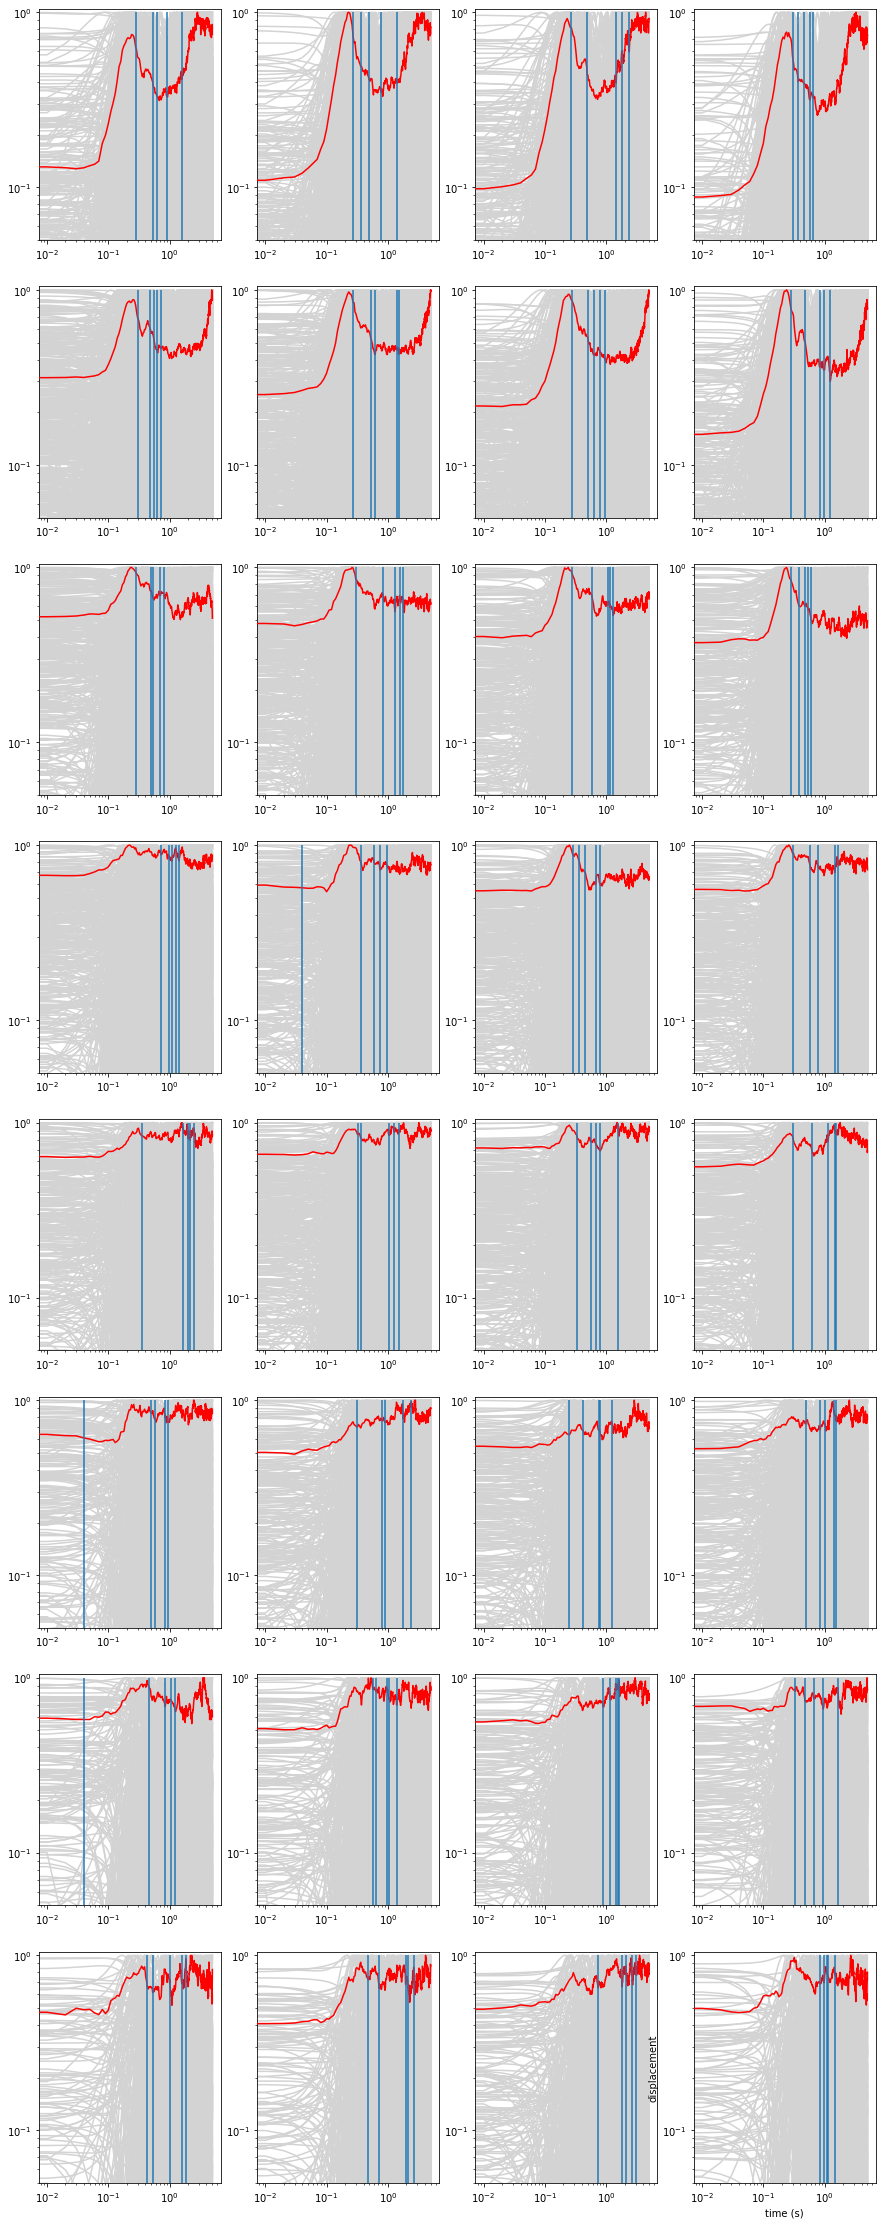

In [19]:
fig, axs = plt.subplots(8, 4, figsize = (15,40)) #df.shape[1]-1
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns[:4]:
        #print('for column')
        #aad[column][row]=df[column][row]/counts[column][row]#df = sum of absolute displacements
        aad[column][row]=np.median(np.array(ad[column][row]), 0)
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = 5 # sampling rate is 50 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row
        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline += 1
                if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            print(T_dp[0:5])
            for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                #axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
                axs[row_count][col_count].vlines(T_dp[i], 0.0001, 1, zorder = 100)
            if float("{:.2f}".format(T_dp[0]))>0.2:
                print(column, row_count, T_dp[0], counts[column][row])
                results[row].append([column, row_count, T_dp[0], counts[column][row]])
            elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                print(column, row_count, T_dp[1], counts[column][row])
                results[row].append([column, row_count, T_dp[1], counts[column][row]])
        axs[row_count][col_count].plot(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:500]), zorder = 50, color = 'red')
        for ind_ad in ad[column][row]:
            axs[row_count][col_count].plot(np.arange(0, 5, 0.01), ind_ad[:500]/max(ind_ad[:500]), color='lightgrey')
        axs[row_count][col_count].set_ylim([0.05, 1.05])
        axs[row_count][col_count].set_xscale('log')
        axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [187]:
aad_bin

array([  2.44813105e-06,   2.64412203e-06,   2.85109020e-06, ...,
         7.53421091e-07,   5.83380897e-07,   4.19082451e-07])

onto row/column plot
[ 0.28  0.53  0.63  0.9   1.59]
3.0 0 0.28 484
[ 0.27  0.36  0.5   0.77  1.4 ]
3.1 0 0.27 484
[ 0.27  0.49  1.43  1.83  2.33]
3.2 0 0.27 484
[ 0.3   0.37  0.46  0.57  0.64]
3.3 0 0.3 484
[ 0.3   0.48  0.56  0.63  0.73]
3.0 1 0.3 697
[ 0.27  0.52  0.62  1.42  1.49]
3.1 1 0.27 697
[ 0.28  0.51  0.62  0.78  0.96]
3.2 1 0.28 697
[ 0.28  0.47  0.83  0.96  1.21]
3.3 1 0.28 697
[ 0.28  0.49  0.54  0.71  0.82]
3.0 2 0.28 436
[ 0.3   0.84  1.29  1.58  1.76]
3.1 2 0.3 437
[ 0.28  0.58  1.06  1.14  1.29]
3.2 2 0.28 437
[ 0.28  0.38  0.48  0.54  0.59]
3.3 2 0.28 437
[ 0.73  0.99  1.09  1.29  1.41]
3.0 3 0.73 412
[ 0.04  0.37  0.6   0.73  0.96]
3.1 3 0.37 408
[ 0.29  0.36  0.45  0.67  0.78]
3.2 3 0.29 408
[ 0.3   0.58  0.77  1.45  1.64]
3.3 3 0.3 408
[ 0.35  1.65  1.98  2.14  2.54]
3.0 4 0.35 352
[ 0.32  0.37  1.05  1.25  1.54]
3.1 4 0.32 351
[ 0.33  0.56  0.68  0.79  1.58]
3.2 4 0.33 351
[ 0.31  0.63  1.14  1.46  1.55]
3.3 4 0.31 351
[ 0.04  0.5   0.57  0.85  0.96]
3.0 5 0.5 2

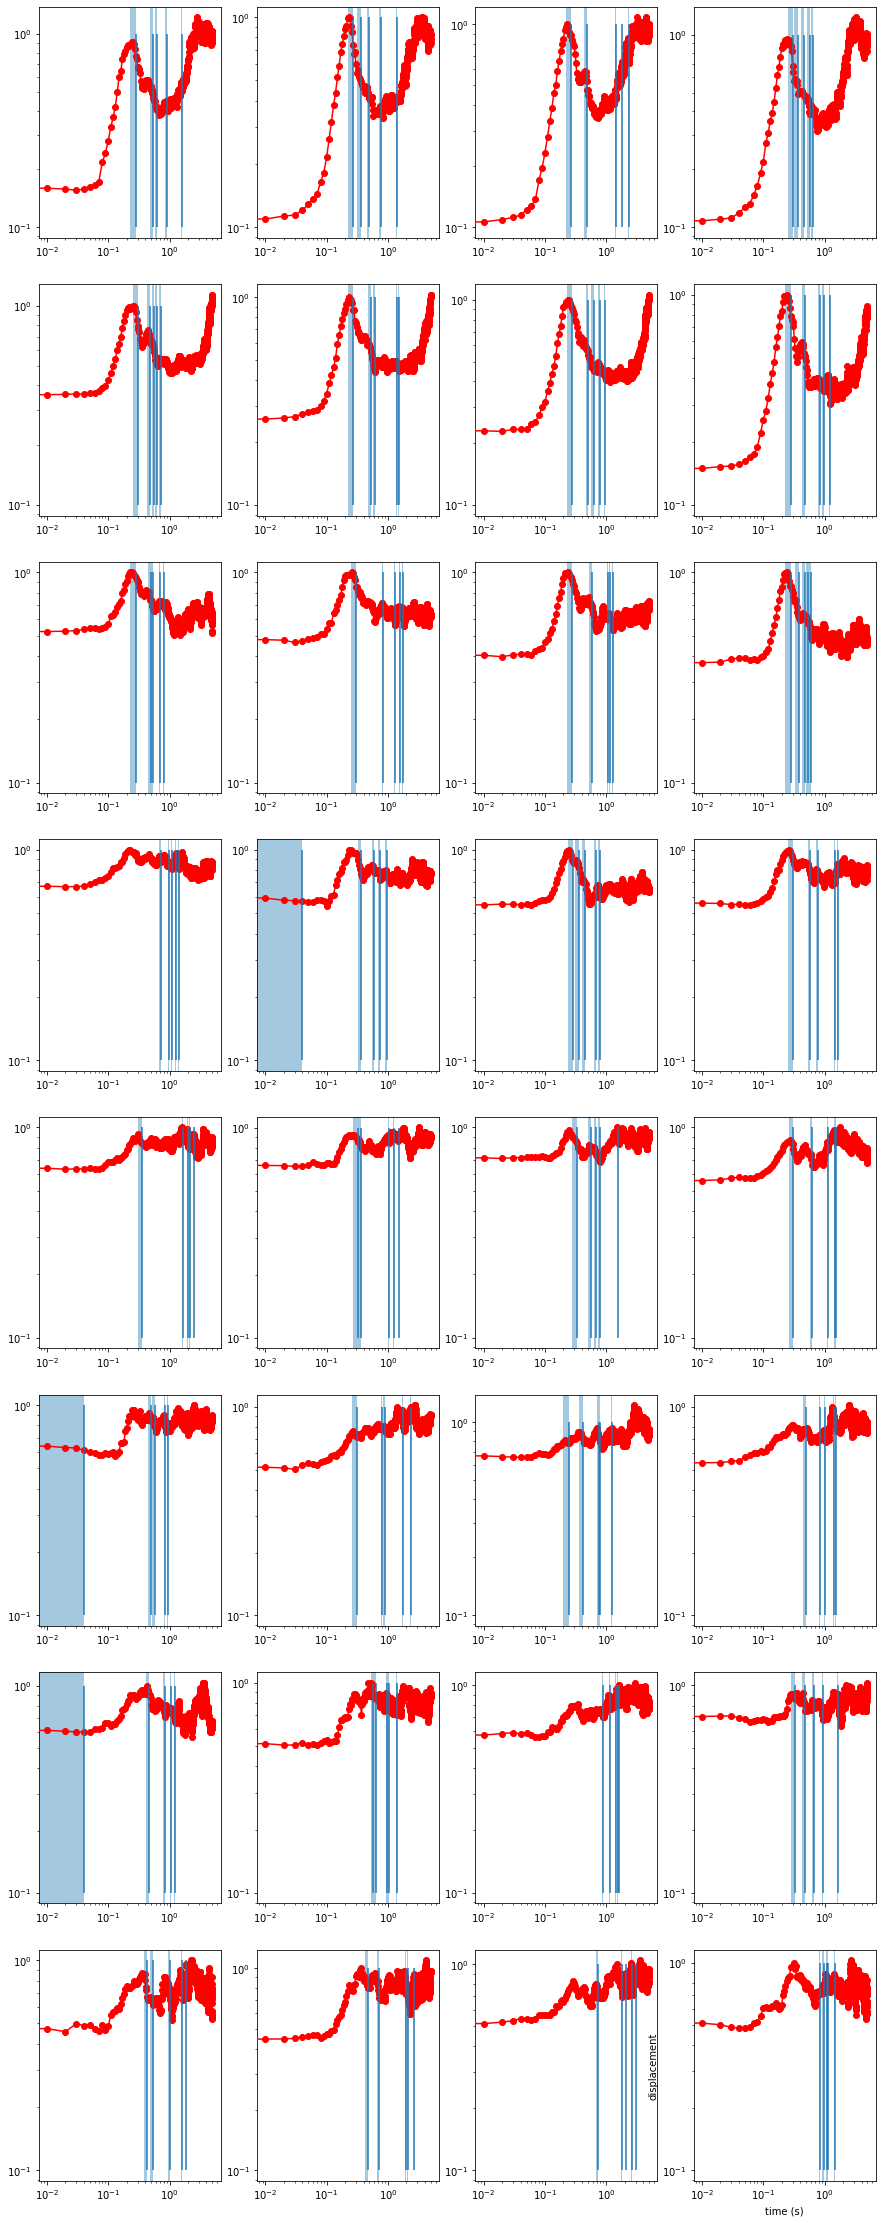

In [14]:
fig, axs = plt.subplots(8, 4, figsize = (15,40)) #df.shape[1]-1
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns[:4]:
        #print('for column')
        #aad[column][row]=df[column][row]/counts[column][row]#df = sum of absolute displacements
        aad[column][row]=np.median(np.array(ad[column][row]), 0)
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = 5 # sampling rate is 100 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row
        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline = decline + 1
                if decline == 4:#np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            print(T_dp[0:5])
            for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                #axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
                axs[row_count][col_count].vlines(T_dp[i], 0.1, 1, zorder = 100)
                axs[row_count][col_count].axvspan(T_dp[i]-0.05, T_dp[i], alpha = 0.4)
            if float("{:.2f}".format(T_dp[0]))>0.2:
                print(column, row_count, T_dp[0], counts[column][row])
                results[row].append([column, row_count, T_dp[0], counts[column][row]])
            elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                print(column, row_count, T_dp[1], counts[column][row])
                results[row].append([column, row_count, T_dp[1], counts[column][row]])
        axs[row_count][col_count].plot(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:250]), zorder = 50, color = 'red')
        axs[row_count][col_count].scatter(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:250]), zorder = 50, color = 'red')
        #axs[row_count][col_count].set_xlim(T_dp[0], T_dp[5])
        #axs[row_count][col_count].set_ylim(0.1, 2)
        axs[row_count][col_count].set_xscale('log')
        axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [201]:
results_snr_10 =  [[['5.0', 0, 0.31, 16],
  ['5.1', 0, 1.05, 17],
  ['5.2', 0, 1.0, 16],
  ['5.3', 0, 0.55000000000000004, 17]],
 [['5.0', 1, 0.59999999999999998, 36],
  ['5.1', 1, 0.45000000000000001, 37],
  ['5.2', 1, 0.35999999999999999, 36],
  ['5.3', 1, 0.72999999999999998, 37]],
 [['5.0', 2, 0.5, 51],
  ['5.1', 2, 0.54000000000000004, 52],
  ['5.2', 2, 0.59999999999999998, 51],
  ['5.3', 2, 1.3300000000000001, 52]],
 [['5.0', 3, 0.54000000000000004, 60],
  ['5.1', 3, 0.63, 61],
  ['5.2', 3, 0.73999999999999999, 58],
  ['5.3', 3, 1.03, 61]],
 [['5.0', 4, 0.55000000000000004, 93],
  ['5.1', 4, 0.59999999999999998, 94],
  ['5.2', 4, 0.68000000000000005, 91],
  ['5.3', 4, 0.56000000000000005, 91]],
 [['5.0', 5, 0.69999999999999996, 67],
  ['5.1', 5, 0.68999999999999995, 68],
  ['5.2', 5, 0.48999999999999999, 60],
  ['5.3', 5, 0.78000000000000003, 68]],
 [['5.0', 6, 0.22, 45],
  ['5.1', 6, 0.44, 46],
  ['5.2', 6, 0.71999999999999997, 44],
  ['5.3', 6, 0.42999999999999999, 46]],
 [['5.0', 7, 0.52000000000000002, 13],
  ['5.1', 7, 0.38, 14],
  ['5.2', 7, 0.56999999999999995, 14],
  ['5.3', 7, 0.40999999999999998, 4]]]

In [21]:
import matplotlib.pylab as pl

In [22]:
pl.cm.jet(np.linspace(5.0,7.0,21))

array([[ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ]])

In [28]:
np.linspace(0,1,41)

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ])

onto row/column plot


/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad

/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad

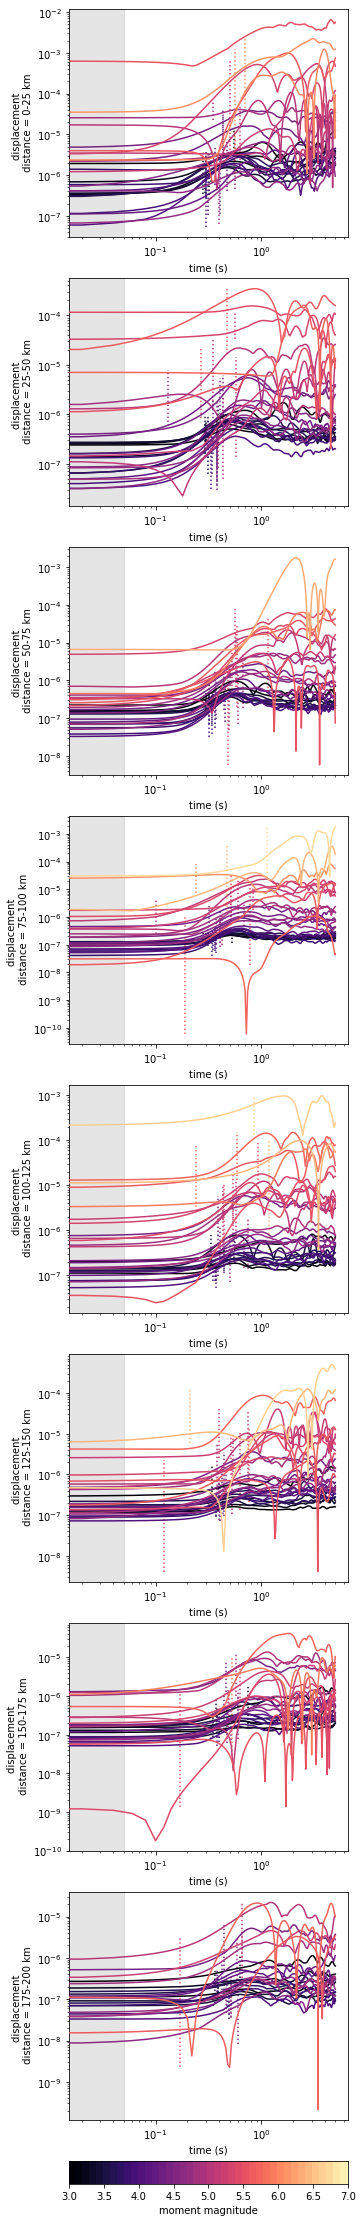

In [47]:
fig, axs = plt.subplots(9, 1, figsize=(5, 40), gridspec_kw={'height_ratios': [5,5,5,5,5,5,5,5, 0.5]})

import matplotlib.patches as mpatches
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
import matplotlib.pylab as pl
colors = pl.cm.magma(np.linspace(0,1,41))
#cmap = pl.cm.get_cmap('magma', 21)  
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns[:-1]:#columns are magnitudes
        #print('for column')
        aad[column][row]=df[column][row]/counts[column][row]
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = 5 # sampling rate is 50 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row
        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline += 1
                if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            #print(T_dp[0:5])
            #for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
            #    axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
            if float("{:.2f}".format(T_dp[0]))>0.05:
                #print(column, row_count, T_dp[0], counts[column][row])
                results[row].append([column, row_count, T_dp[0], counts[column][row]])
                axs[row_count].vlines(T_dp[0], min(aad[column][row][:250]), max(aad[column][row][:250]), color = colors[col_count], linestyle = ':')
            elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                #print(column, row_count, T_dp[1], counts[column][row])
                results[row].append([column, row_count, T_dp[1], counts[column][row]])
        axs[row_count].plot(np.arange(0, 5, 0.02), aad[column][row][:250], zorder = 50, color = colors[col_count])
        #for ind_ad in ad[column][row]:
        #    axs[row_count][col_count].plot(np.arange(0, 5, 0.02), ind_ad[:250], color='lightgrey')
        axs[row_count].set_xscale('log')
        axs[row_count].set_yscale('log') # in log space
        col_count += 1
    axs[row_count].set_ylabel(f'displacement \n distance = {row_count*25}-{row_count*25+25} km')
    axs[row_count].set_xlabel('time (s)')
    axs[row_count].axvspan(0, 0.05, color='grey', alpha = 0.2)
    row_count += 1



left = 3
axs[8].set_ylim([0,1])
axs[8].set_xlim([3,7])
for c in range(0, 41):
    rect=mpatches.Rectangle((left,0),0.1,1, fill=True,color=colors[c],linewidth=2,facecolor=colors[c])
    axs[8].add_patch(rect)
    left += 0.1
axs[8].set_xlabel('moment magnitude')
axs[8].set_xticks(np.arange(3,7.1,0.5))
axs[8].set_yticks([])
#cax = axs[8].add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
#fig.colorbar(colors, cax=axs[8], orientation='horizontal')
#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')

plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [24]:
results[1]

[['5.0', 1, 0.51000000000000001, 54],
 ['5.1', 1, 0.90000000000000002, 55],
 ['5.2', 1, 0.22, 53],
 ['5.3', 1, 0.92000000000000004, 55],
 ['5.4', 1, 0.68999999999999995, 47],
 ['5.5', 1, 0.75, 52],
 ['5.6', 1, 0.29999999999999999, 55],
 ['5.7', 1, 1.02, 55],
 ['5.8', 1, 1.6000000000000001, 52],
 ['5.9', 1, 0.68000000000000005, 51],
 ['6.0', 1, 1.24, 5],
 ['6.1', 1, 1.05, 2],
 ['6.2', 1, 0.59999999999999998, 6],
 ['6.3', 1, 0.63, 2],
 ['6.4', 1, 0.91000000000000003, 1]]

In [10]:
#%%script false --no-raise-error
results = [['5.0', 0, 0.32000000000000001, 23],
 ['5.1', 0, 0.58999999999999997, 24],
 ['5.2', 0, 0.35999999999999999, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.72999999999999998, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92000000000000004, 2],
 ['6.0', 0, 0.56000000000000005, 2],
 ['6.1', 0, 1.5700000000000001, 2],
 ['6.4', 0, 1.3600000000000001, 3],
 ['5.0', 1, 0.52000000000000002, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.56999999999999995, 31],
 ['5.3', 1, 0.76000000000000001, 31],
 ['5.4', 1, 0.69999999999999996, 50],
 ['5.5', 1, 0.29999999999999999, 6],
 ['5.6', 1, 0.46999999999999997, 7],
 ['5.7', 1, 0.52000000000000002, 6],
 ['5.8', 1, 0.96999999999999997, 30],
 ['5.9', 1, 1.0800000000000001, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64000000000000001, 1],
 ['6.4', 1, 0.91000000000000003, 3],
 ['6.8', 1, 1.1899999999999999, 3],
 ['5.0', 2, 0.48999999999999999, 65],
 ['5.1', 2, 0.45000000000000001, 66],
 ['5.2', 2, 0.41999999999999998, 32],
 ['5.3', 2, 0.54000000000000004, 44],
 ['5.4', 2, 0.42999999999999999, 66],
 ['5.5', 2, 0.55000000000000004, 8],
 ['5.6', 2, 0.59999999999999998, 45],
 ['5.8', 2, 0.52000000000000002, 42],
 ['5.9', 2, 0.58999999999999997, 44],
 ['6.0', 2, 1.3600000000000001, 7],
 ['6.1', 2, 0.56999999999999995, 7],
 ['6.3', 2, 1.1000000000000001, 1],
 ['6.4', 2, 1.8100000000000001, 8],
 ['6.6', 2, 0.94999999999999996, 1],
 ['5.0', 3, 0.47999999999999998, 66],
 ['5.1', 3, 0.56999999999999995, 67],
 ['5.2', 3, 0.68999999999999995, 53],
 ['5.3', 3, 0.56000000000000005, 67],
 ['5.4', 3, 0.54000000000000004, 67],
 ['5.5', 3, 0.56999999999999995, 36],
 ['5.6', 3, 0.76000000000000001, 38],
 ['5.7', 3, 0.63, 53],
 ['5.8', 3, 0.70999999999999996, 28],
 ['5.9', 3, 0.20999999999999999, 53],
 ['6.0', 3, 1.23, 10],
 ['6.1', 3, 1.05, 9],
 ['6.3', 3, 0.56000000000000005, 9],
 ['6.4', 3, 1.1599999999999999, 11],
 ['6.6', 3, 0.68000000000000005, 1],
 ['6.7', 3, 1.1299999999999999, 2],
 ['6.8', 3, 0.35999999999999999, 11],
 ['5.0', 4, 0.56000000000000005, 56],
 ['5.1', 4, 0.42999999999999999, 56],
 ['5.2', 4, 0.68000000000000005, 21],
 ['5.3', 4, 0.48999999999999999, 56],
 ['5.4', 4, 0.46999999999999997, 56],
 ['5.5', 4, 0.46000000000000002, 4],
 ['5.6', 4, 0.58999999999999997, 38],
 ['5.7', 4, 0.57999999999999996, 4],
 ['5.8', 4, 0.63, 36],
 ['5.9', 4, 0.56000000000000005, 25],
 ['6.0', 4, 1.22, 5],
 ['6.3', 4, 0.65000000000000002, 5],
 ['6.4', 4, 1.29, 6],
 ['6.6', 4, 0.35999999999999999, 1],
 ['6.7', 4, 0.72999999999999998, 1],
 ['6.8', 4, 1.3200000000000001, 6],
 ['5.0', 5, 0.59999999999999998, 9],
 ['5.1', 5, 0.60999999999999999, 10],
 ['5.2', 5, 0.77000000000000002, 10],
 ['5.3', 5, 0.78000000000000003, 10],
 ['5.4', 5, 0.42999999999999999, 10],
 ['5.6', 5, 0.75, 1],
 ['5.7', 5, 0.56000000000000005, 10],
 ['6.0', 5, 0.67000000000000004, 5],
 ['6.3', 5, 0.69999999999999996, 6],
 ['5.0', 6, 0.60999999999999999, 9],
 ['5.1', 6, 0.73999999999999999, 9],
 ['5.2', 6, 0.95999999999999996, 9],
 ['5.3', 6, 0.39000000000000001, 5],
 ['5.4', 6, 0.62, 10],
 ['5.0', 7, 0.62, 10],
 ['5.2', 7, 0.54000000000000004, 10],
 ['5.3', 7, 0.77000000000000002, 11],
 ['5.4', 7, 0.46999999999999997, 9]]

In [10]:
import numpy as np
from scipy import optimize, linalg
import matplotlib.pyplot as plt

def model_function(x_data, a, b):
    return a*x_data + b

In [18]:
results

[['5.0', 0, 0.32, 23],
 ['5.1', 0, 0.59, 24],
 ['5.2', 0, 0.36, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.73, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92, 2],
 ['6.0', 0, 0.56, 2],
 ['6.1', 0, 1.57, 2],
 ['6.4', 0, 1.36, 3],
 ['5.0', 1, 0.52, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.57, 31],
 ['5.3', 1, 0.76, 31],
 ['5.4', 1, 0.7, 50],
 ['5.5', 1, 0.3, 6],
 ['5.6', 1, 0.47, 7],
 ['5.7', 1, 0.52, 6],
 ['5.8', 1, 0.97, 30],
 ['5.9', 1, 1.08, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64, 1],
 ['6.4', 1, 0.91, 3],
 ['6.8', 1, 1.19, 3],
 ['5.0', 2, 0.49, 65],
 ['5.1', 2, 0.45, 66],
 ['5.2', 2, 0.42, 32],
 ['5.3', 2, 0.54, 44],
 ['5.4', 2, 0.43, 66],
 ['5.5', 2, 0.55, 8],
 ['5.6', 2, 0.6, 45],
 ['5.8', 2, 0.52, 42],
 ['5.9', 2, 0.59, 44],
 ['6.0', 2, 1.36, 7],
 ['6.1', 2, 0.57, 7],
 ['6.3', 2, 1.1, 1],
 ['6.4', 2, 1.81, 8],
 ['6.6', 2, 0.95, 1],
 ['5.0', 3, 0.48, 66],
 ['5.1', 3, 0.57, 67],
 ['5.2', 3, 0.69, 53],
 ['5.3', 3, 0.56, 67],
 ['5.4', 3, 0.54, 67],
 ['5.5', 3, 0.57, 36],
 ['5.6', 3, 0

In [17]:
results_concat

array([['5.0', '0', '0.73', '10'],
       ['5.1', '0', '0.44', '11'],
       ['5.2', '0', '0.43', '11'],
       ['5.3', '0', '0.44', '10'],
       ['5.4', '0', '0.73', '2'],
       ['5.6', '0', '0.93', '2'],
       ['6.0', '0', '0.4', '1'],
       ['5.0', '1', '0.6', '14'],
       ['5.1', '1', '0.46', '15'],
       ['5.2', '1', '0.38', '15'],
       ['5.3', '1', '0.55', '5'],
       ['5.4', '1', '0.8', '5'],
       ['5.5', '1', '0.79', '15'],
       ['5.7', '1', '0.65', '15'],
       ['5.8', '1', '0.44', '15'],
       ['6.0', '1', '0.61', '1'],
       ['6.4', '1', '0.83', '1'],
       ['5.0', '2', '0.61', '20'],
       ['5.1', '2', '0.33', '21'],
       ['5.2', '2', '0.46', '21'],
       ['5.3', '2', '0.36', '21'],
       ['5.4', '2', '0.57', '20'],
       ['5.5', '2', '0.58', '21'],
       ['5.6', '2', '0.58', '21'],
       ['5.7', '2', '0.87', '21'],
       ['5.8', '2', '0.78', '21'],
       ['6.0', '2', '1.44', '1'],
       ['6.2', '2', '0.66', '1'],
       ['6.3', '2', '1.09', '1']

In [29]:
all_mag = []
n = []
tdp_all = []
results_concat = []
#for i in results:
results_concat = np.concatenate(results)
for i in results_concat:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
    n.append(float(i[3]))
y = all_mag
x = tdp_all    
x = np.array(x)

In [14]:
results_concat

array(['5.0', '0', '0.32', '23', '5.1', '0', '0.59', '24', '5.2', '0',
       '0.36', '2', '5.3', '0', '0.5', '11', '5.4', '0', '0.73', '24',
       '5.5', '0', '0.62', '2', '5.6', '0', '0.92', '2', '6.0', '0',
       '0.56', '2', '6.1', '0', '1.57', '2', '6.4', '0', '1.36', '3',
       '5.0', '1', '0.52', '50', '5.1', '1', '0.37', '50', '5.2', '1',
       '0.57', '31', '5.3', '1', '0.76', '31', '5.4', '1', '0.7', '50',
       '5.5', '1', '0.3', '6', '5.6', '1', '0.47', '7', '5.7', '1', '0.52',
       '6', '5.8', '1', '0.97', '30', '5.9', '1', '1.08', '31', '6.0', '1',
       '0.5', '2', '6.2', '1', '0.64', '1', '6.4', '1', '0.91', '3', '6.8',
       '1', '1.19', '3', '5.0', '2', '0.49', '65', '5.1', '2', '0.45',
       '66', '5.2', '2', '0.42', '32', '5.3', '2', '0.54', '44', '5.4',
       '2', '0.43', '66', '5.5', '2', '0.55', '8', '5.6', '2', '0.6', '45',
       '5.8', '2', '0.52', '42', '5.9', '2', '0.59', '44', '6.0', '2',
       '1.36', '7', '6.1', '2', '0.57', '7', '6.3', '2', '

In [ ]:
initial_guess = (1.5, 6)

In [ ]:
def obj(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

def obj_flipped(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    t_guess = (a*m_real+b)
    return sum(abs(t_guess-t))

In [ ]:
res = optimize.minimize(obj, initial_guess, method = 'Nelder-Mead')

In [ ]:
res

In [ ]:
a = 2.29
b = 5.95
m_real = np.array(all_mag)
t = np.log10(np.array(tdp_all))
m_guess = (a*t+b)
sum(abs(m_guess-m_real))

BOOTSTRAPPING -- np.polyfit

In [ ]:
import random 
def bootstrapping_function():
    m_all = np.array(all_mag)
    t_all = np.array(tdp_all)
    t_BS = []
    m_BS = []
    for count in range(0,len(t_all)):
        #print(count)
        i = random.randrange(0,len(t_all))
        t_BS.append(t_all[i])
        m_BS.append(m_all[i])
    print(t_BS[0], m_BS[0])
    return m_BS, t_BS

In [ ]:
def obj_BS_1(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    #print(m_real[0], t[0])
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_BS_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

In [ ]:
gradt = []
intercepts = []
gradt_2 = []
intercepts_2 = []
gradt_polyfit = []
intercepts_polyfit = []
for bs in range(0, 1000):
    print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    m_BS, t_BS = bootstrapping_function()
    res = optimize.minimize(obj_BS_1, initial_guess, method = 'TNC')
    gradt.append(res.x[0])
    intercepts.append(res.x[1])
    #print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    res = optimize.minimize(obj_BS_2, initial_guess, method = 'TNC')
    gradt_2.append(res.x[0])
    intercepts_2.append(res.x[1])  
    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
    gradt_polyfit.append(a)
    intercepts_polyfit.append(b)    

In [ ]:

#for bs in range(0, 100):
#    print('bootstrapping run'+str(bs))
#    m_BS, t_BS = bootstrapping_function()
#    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
#    gradt_polyfit.append(a)
#    intercepts_polyfit.append(b)

In [ ]:
min(intercepts), max(intercepts)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
i_bins = list(np.arange(5,6.5, 0.02))
g_bins = list(np.arange(-2, 3,0.1))

res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
res_3 = optimize.minimize(obj, initial_guess, method = 'TNC')
res_2 = optimize.minimize(obj_2, initial_guess, method = 'nelder-mead')

intercepts.sort()
intercepts_2.sort()
n, bins, patches = axs[0].hist(intercepts, bins = i_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)
axs[0].hist(intercepts_2, bins = i_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
#axs[0].hist(intercepts_polyfit, bins = i_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[0].vlines(res.x[1], 0, 200, color = 'tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[0].vlines(res_3.x[1], 0, 200, color = 'tab:green', label = 'TNC optimize.minimize all data, 1-norm')
axs[0].vlines(res_2.x[1], 0, 200, color = 'tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[0].vlines(5.95, 0, 200, color = 'k', label = 'published')
axs[0].vlines(intercepts[25], 0, 200, linestyle = ':')
axs[0].vlines(intercepts[975], 0, 200, linestyle = ':')
axs[0].vlines(intercepts_2[25], 0, 200, linestyle = ':', color = 'orange')
axs[0].vlines(intercepts_2[975], 0, 200, linestyle = ':', color = 'orange')

gradt.sort()
gradt_2.sort()
axs[1].vlines(res.x[0], 0 , 200, color='tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[1].vlines(res_2.x[0], 0 , 200, color='tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[1].vlines(res_3.x[0], 0 , 200, color='tab:green', label = 'TNC optimize.minimize all data, 2-norm')
axs[1].vlines(2.29, 0 , 200, color = 'k', label = 'published')
axs[1].vlines(gradt[25], 0 , 200, linestyle = ':')
axs[1].vlines(gradt[975], 0 , 200, linestyle = ':')
axs[1].vlines(gradt_2[25], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].vlines(gradt_2[975], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].hist(gradt, bins = g_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
axs[1].hist(gradt_2, bins = g_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)

axs[0].set_title('intercepts')
axs[0].ticklabel_format(useOffset=False)
axs[0].ticklabel_format(useOffset=False)
#axs[1].hist(gradt_polyfit, bins = g_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[1].set_title('gradients')
axs[1].ticklabel_format(useOffset=False)
axs[1].ticklabel_format(useOffset=False)
axs[0].legend()
axs[1].legend()

In [ ]:
max(gradt)

In [ ]:
intercepts[25]

In [42]:
q = 0
for i in results:
    for j in i:
        q = q+j[-1]


In [43]:
q

3594

0.419800986407 5.60930315909
1.1130167183 5.63507563715
 final_simplex: (array([[ 1.11301672,  5.63507564],
       [ 1.11292922,  5.63506064],
       [ 1.11309168,  5.63506616]]), array([ 3.22841899,  3.22842462,  3.22842982]))
           fun: 3.2284189941303083
       message: 'Optimization terminated successfully.'
          nfev: 211
           nit: 110
        status: 0
       success: True
             x: array([ 1.11301672,  5.63507564])
0.419800986407 5.60930315909
1.1130167183 5.63507563715
 final_simplex: (array([[ 1.11301672,  5.63507564],
       [ 1.11292922,  5.63506064],
       [ 1.11309168,  5.63506616]]), array([ 3.22841899,  3.22842462,  3.22842982]))
           fun: 3.2284189941303083
       message: 'Optimization terminated successfully.'
          nfev: 211
           nit: 110
        status: 0
       success: True
             x: array([ 1.11301672,  5.63507564])
0.771754702869 5.74264578186
1.04339551807 5.90723875357
 final_simplex: (array([[ 1.04339552,  5.907238

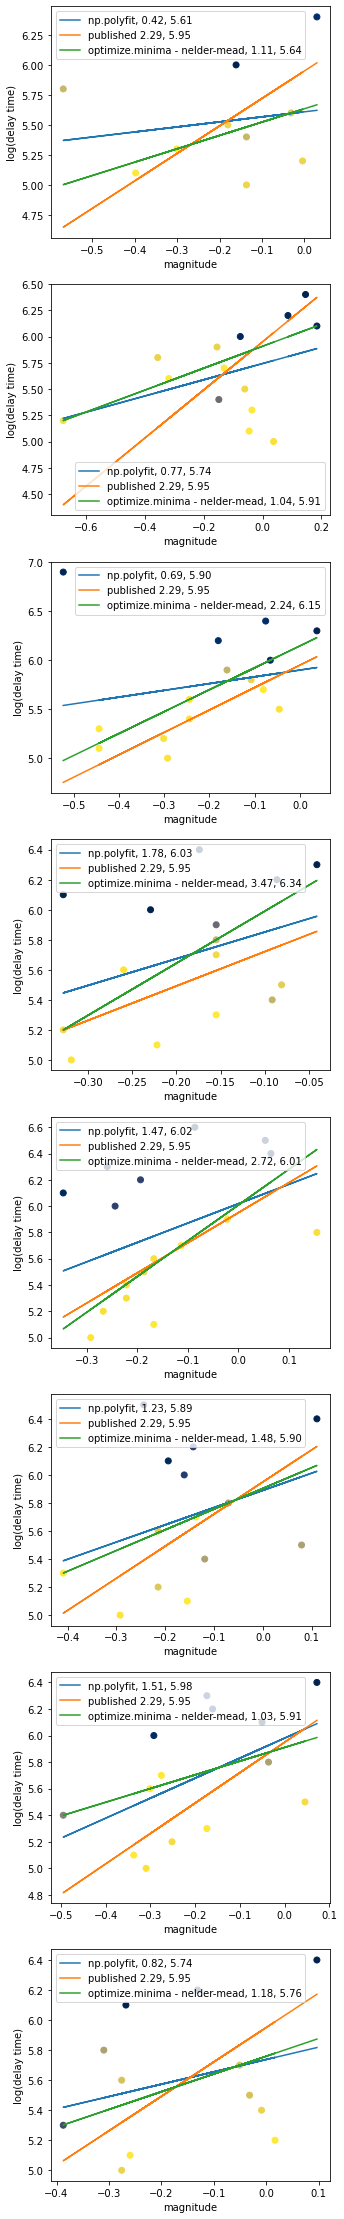

In [54]:
#%conda install ipympl
%matplotlib inline
initial_guess = (0,0)#2.29,5.95)
fig, axs = plt.subplots(8,1, figsize=(5,40))
for r in range(0, 8):
    all_mag = []
    n = []
    tdp_all = []
    for i in results[r]:
        all_mag.append(float(i[0]))
        tdp_all.append(float(i[2]))
        n.append(float(i[3]))
    y = all_mag
    x = tdp_all    
    x = np.array(x)
    
    def obj(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum(abs(m_guess-m_real))
    def obj_2(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum((m_guess-m_real)**2)

    def obj_flipped(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        t_guess = (a*m_real+b)
        return sum(abs(t_guess-t))
    def obj_weighted(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum(abs(m_guess-m_real)*n)

    #===================================================================
    sc = axs[r].scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'cividis')
    #axs[r][0].scatter(np.log10(tdp_all), all_mag, marker = '.', color='k')
    #cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
    axs[r].plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
                label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
    print(a,b)

    axs[r].plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
                label='published 2.29, 5.95')

    res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
    axs[r].plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
                label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
    print(res.x[0], res.x[1])
    print(res)
    axs[r].set_xlabel('log(delay time)')
    axs[r].set_ylabel('magnitude')

    #===================================================================
    '''sc = axs[r][1].scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
    #cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
    axs[r][1].plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
                label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
    print(a,b)

    axs[r][1].plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
                label='published 2.29, 5.95')

    res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
    axs[r][1].plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
                label='optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
    print(res.x[0], res.x[1])
    print(res)
    axs[r][1].set_xlabel('log(delay time)')
    axs[r][1].set_ylabel('magnitude')'''
    '''sc = axs[r][1].scatter(all_mag, np.log10(tdp_all), c = n, cmap = 'gray')
    #cax = fig.add_axes([0.555, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x= np.array(all_mag), y=np.log10(np.array(tdp_all)), deg=1)
    axs[r][1].plot(np.array(all_mag), a*np.array(all_mag)+b, label='np.polyfit')

    axs[r][1].plot(np.array(all_mag), 0.437*np.array(all_mag)-2.598, label='published-flipped')

    res = optimize.minimize(obj_flipped, initial_guess, method = 'TNC')
    axs[r][1].plot(np.array(all_mag), res.x[0]*np.array(all_mag)+res.x[1], 
                label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))'''

    axs[r].set_ylabel('log(delay time)')
    axs[r].set_xlabel('magnitude')
    print(a,b)
    print(res.x[0], res.x[1])
    print(res)
    axs[r].legend()
    axs[r].legend()
    
plt.show()
    

In [32]:
tdp_all

[0.48,
 0.6,
 0.47,
 0.7,
 0.81,
 0.83,
 0.55,
 0.7,
 0.7,
 0.7,
 0.59,
 0.47,
 0.82,
 0.91,
 0.67]

In [ ]:
def obj_weighted(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real)*n)

In [ ]:
plt.hist(tdp_all, bins = np.arange(0, 3, 0.1))

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
sc = axs.scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
fig.colorbar(sc, cax=cax, orientation='horizontal')

[a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
axs.plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
            label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
print(a,b)

axs.plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
            label='published 2.29, 5.95')

res = optimize.minimize(obj, initial_guess, method = 'TNC')
axs.plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))

res = optimize.minimize(obj_weighted, initial_guess, method = 'TNC')
axs.plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='weighted  optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
print(res.x[0], res.x[1])
print(res)
axs.set_xlabel('log(delay time)')
axs.set_ylabel('magnitude')
axs.legend()

In [ ]:
J = res.jac
JT = J.transpose()
H = np.dot(JT, J)
cov = np.linalg.inv(H)

In [ ]:
H

In [ ]:
U, s, Vh = linalg.svd(res.jac, full_matrices=False)
tol = np.finfo(float).eps*s[0]*max(res.jac.shape)
w = s > tol
cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
perr = np.sqrt(np.diag(cov))   

In [ ]:
print(min(np.log10(tdp_all)),min(tdp_all))

In [ ]:
plt.scatter(tdp_all, all_mag)

In [ ]:
tdp_all

In [ ]:
#res = optimize.minimize(obj, x0)

In [ ]:
#results

In [ ]:
# plot line of best fit
#popt, pcov = curve_fit(model_function, np.log(np.array(tdp_all)), np.array(all_mag), absolute_sigma = True)
#plt.plot(np.log(tdp_all), model_function(np.log(tdp_all), *popt), color='orange')
#plt.scatter(np.log(tdp_all), all_mag)

# add 2 * std banding
#perr = np.sqrt(np.diag(pcov))
#x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
#x_lower_me = x_me - 2*perr[1]
#x_upper_me =  x_me + 2*perr[1]
#y_me = popt[0]*x_me+popt[1]
#y_lower_me = popt[0]*x_lower_me-popt[1]
#y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
#plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
#plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.xlim([-1,1])
print(popt, perr)

In [ ]:
print('mw='+str(popt[0])+'*log(Tdp) + ' + str(popt[1]))

In [ ]:
popt

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, np.log10(x), y, absolute_sigma = True)
plt.plot(np.log10(x), model_function(np.log10(x), *popt), color='orange')
plt.scatter(np.log(x), y)

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)

x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
x_me = np.log(x_me)
x_upper_me = np.log(x_upper_me)
x_lower_me = np.log(x_lower_me)
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]

#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.xlim([-1,1])

In [ ]:
popt

In [ ]:
results

In [ ]:
all_mag = []

tdp_all = []
for i in results:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
x = np.array(all_mag)
y = tdp_all    
y = np.array(y)

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, x, np.log(y), absolute_sigma = True)
plt.plot(x, model_function(x, *popt), color='orange')
plt.scatter(x, np.log(y))

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)


In [ ]:
popt